# **Multiple Linear Regression for Bike Sharing Assignment**

#### Submited by Saurabh Bhargava

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.



In [352]:
import warnings # Supress Warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

In [353]:
df = pd.read_csv("https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv")
print(df.shape)                      # Loooking for shape

# Loooking for head output
df.head()



(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [354]:
# Dropping the unwanted columns
# instant is index for the row
# dteday has date. This info is also present in year and month
# casual and registered seems to be the breakup by category for cnt column.

df.drop([ 'instant','dteday','casual','registered' ],axis=1,inplace=True)

In [355]:
#For simplicity of understanding rename columns
df.rename(columns={
    "mnth":"month",
    "hum" : "humidity",
    "yr" : "year",
}, inplace=True)


In [356]:
# Loooking for head output again after colummn rename
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [357]:
# Now loooking for df.info() to see if any object vasr are there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [358]:
# Loooking for df.describe() output
df.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [359]:
# Looking for presence of null values
df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

In [360]:
#Create a copy and print shape
df_copy = df.copy()
print(df_copy.shape)

#Checking if any duplicate exists and if shape changes after drop_duplicates
df_copy.drop_duplicates(inplace=True)
print(df_copy.shape)

duplicates = df[df.duplicated()]
print(duplicates)

(730, 12)
(730, 12)
Empty DataFrame
Columns: [season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed, cnt]
Index: []


In [361]:
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['month']=df['month'].astype('category')
df['weekday']=df['weekday'].astype('category')





In [362]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [363]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [364]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [365]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### 3.3 Look for Outliers



In [367]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

#**Univariate Analysis:**

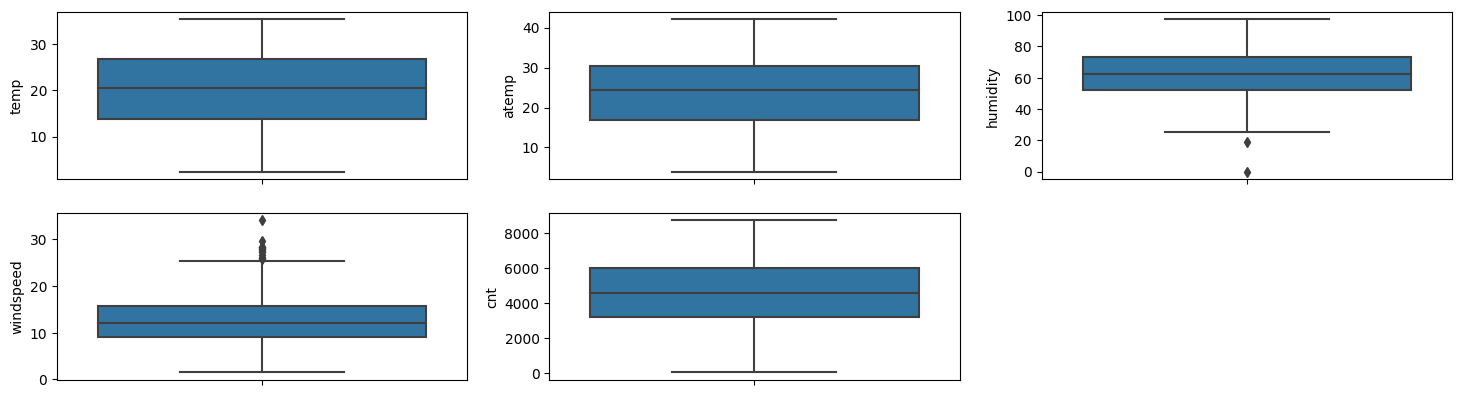

In [368]:
# Draw box plots for indepent variables with continuous values
cols = [ 'temp', 'atemp', 'humidity', 'windspeed', 'cnt']
plt.figure(figsize=(18,10))

i = 1
for col in cols:
    plt.subplot(4,3,i)
    sns.boxplot(y=col, data=df)
    i+=1

Looking at above boxplots, there is no presence of major outlliers

In [369]:
# Creating a corelation table
df.corr()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


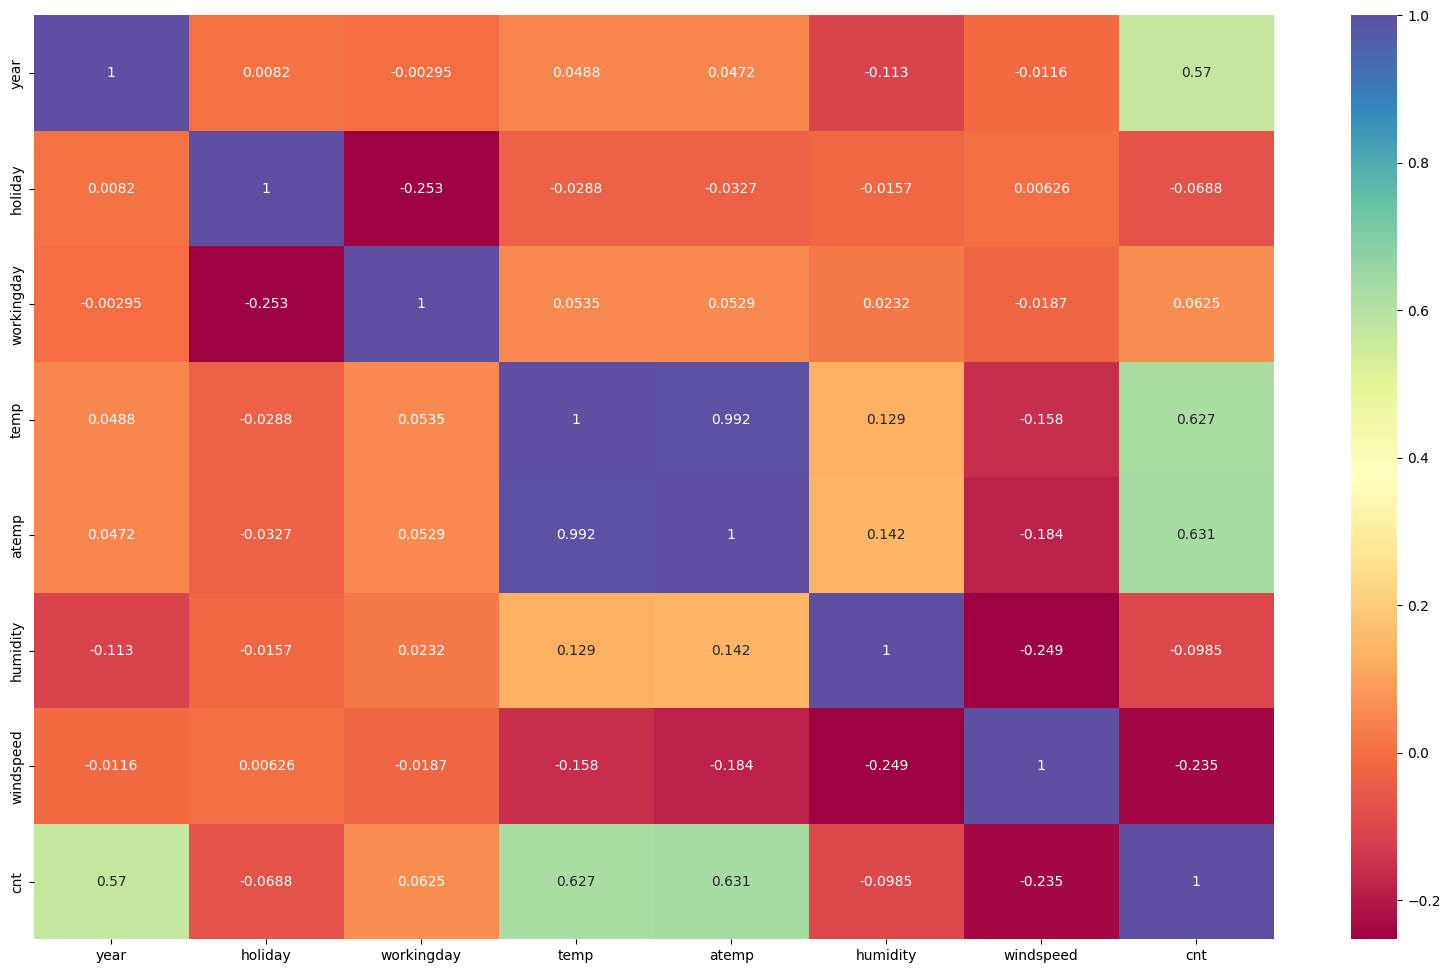

In [370]:
# Using above corr table create a heatmap
plt.figure(figsize = (20, 12))
# sns.heatmap(data=df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
sns.heatmap(data=df.corr(), annot=True, fmt='0.3g', cmap='Spectral')
plt.show()

In [371]:
# Look for high correlation
highCorr = df.corr()[df.corr()>0.5]
highCorr

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.569728
holiday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,1.000000,0.991696,NaN,NaN,0.627044
atemp,NaN,NaN,NaN,0.991696,1.000000,NaN,NaN,0.630685
humidity,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
windspeed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
cnt,0.569728,NaN,NaN,0.627044,0.630685,NaN,NaN,1.000000


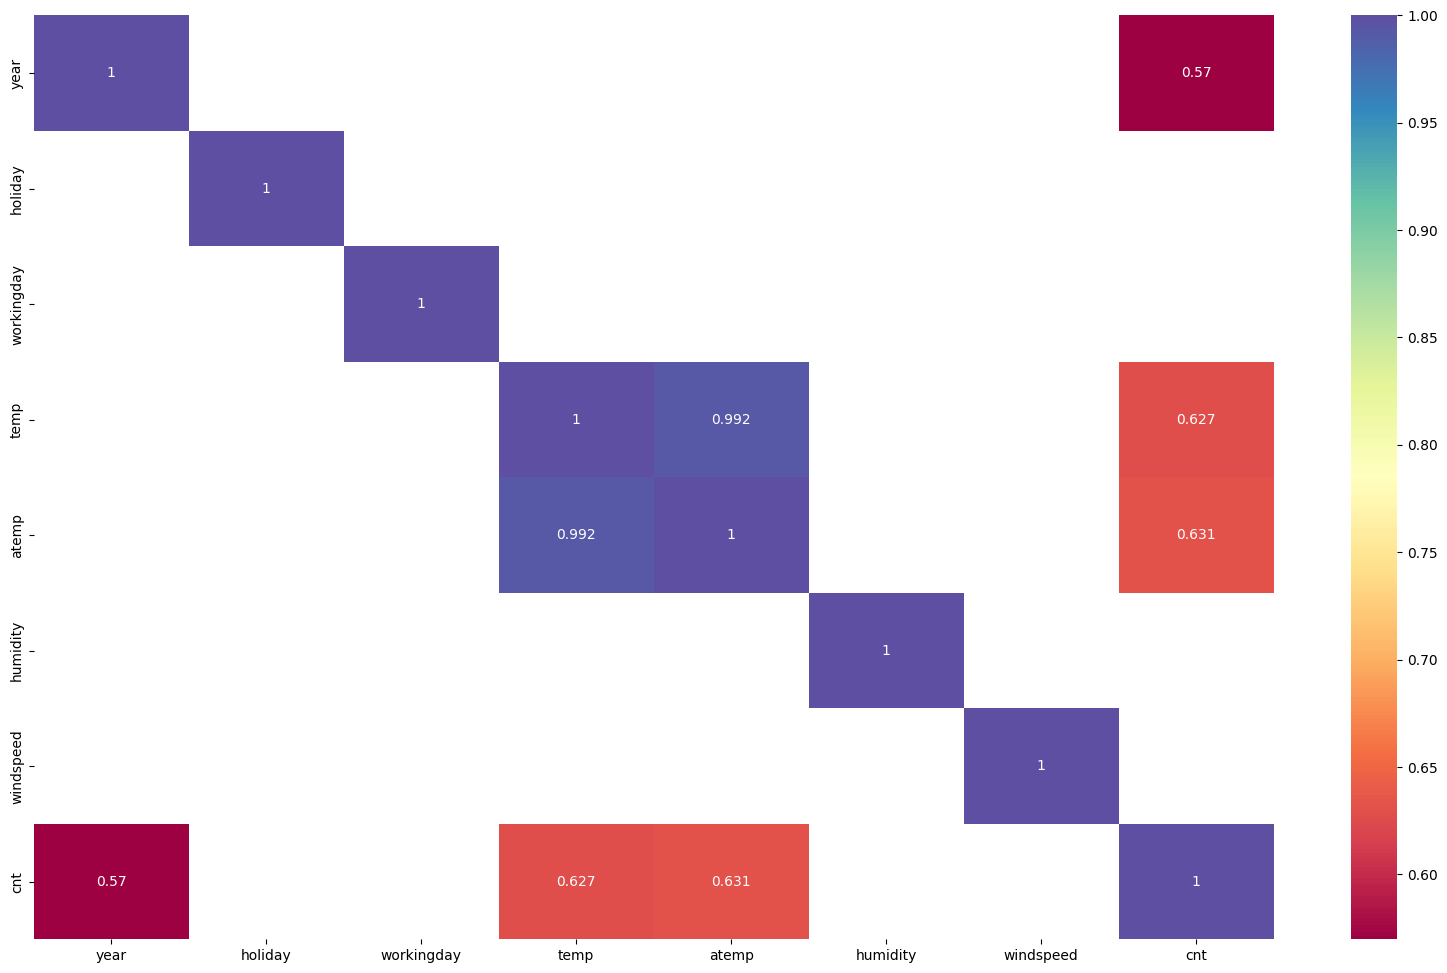

In [372]:
# Using above corr table create a heatmap
plt.figure(figsize = (20, 12))
# sns.heatmap(data=df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
sns.heatmap(data=highCorr, annot=True, fmt='0.3g', cmap='Spectral')
plt.show()

#### From the heatmap, here are few observations related to strong correlation:
1. Instant with year, cnt
2. Temp  with cnt and atemp  
3. Atemp  with cnt and temp
4. Cnt with year, temp, atemp and instant

Atemp and temp are co-related




<Figure size 1000x1000 with 0 Axes>

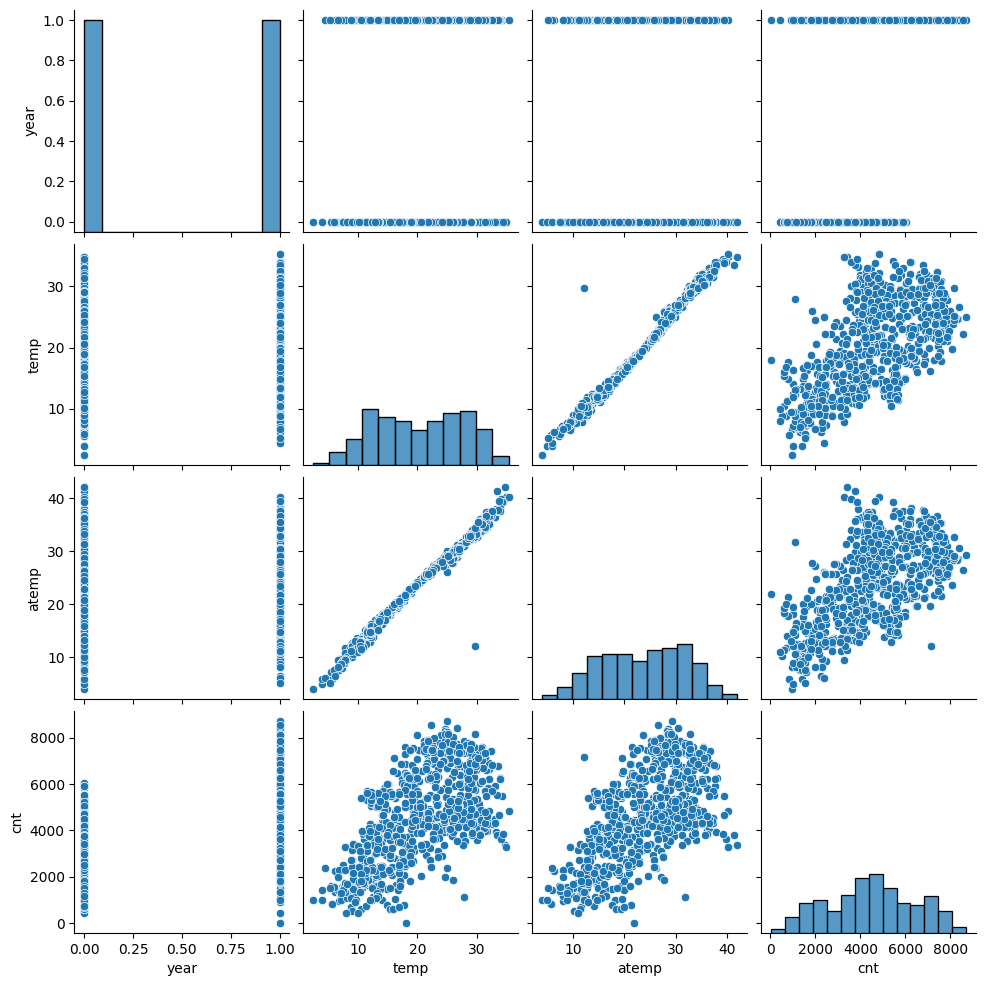

In [373]:
# Looking at above prominant variables from above chart

importantCol = [ 'year' ,  'temp', 'atemp', 'cnt']


plt.figure(figsize=(10,10))
sns.pairplot(df, vars=importantCol)
plt.show()

#### _`Inference`_:
- Variables temp, atemp have the high corelation with the target variable cnt
- temp and atemp are highly co-related with each other

#### As seen from the correlation map and pairplot, output variable has a linear relationship with variables like temp, atemp

# **Bivariate Analysis:**

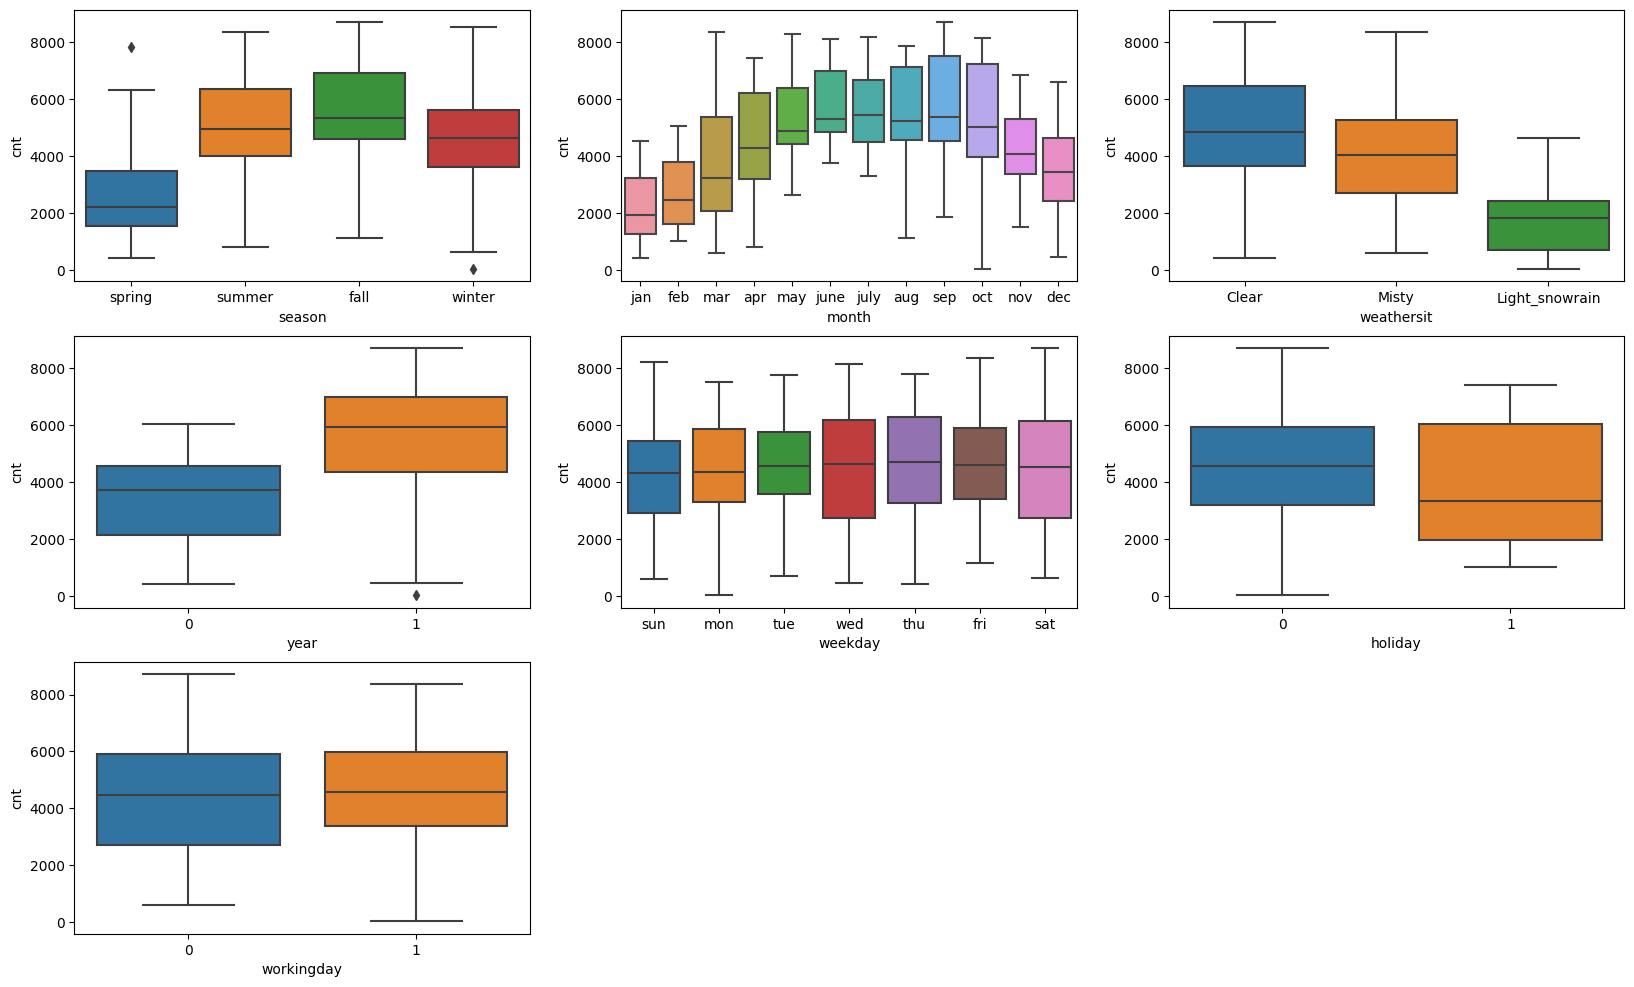

In [374]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',  y = 'cnt', data = df)

plt.subplot(3,3,2)
sns.boxplot(x = 'month',   y = 'cnt', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'year',  y = 'cnt', data = df)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)


plt.show()

## Few observations from above heat map:
### 1. Median of bike rental count is highest for fall season.
### 2. Also maximum bike rental count is for fall season.
### 3. Median of bike rental count is highest for year 2019.

### 4. Highest bike rental count is for month 9 i.e. September.
### 9. Bike rental median for working/non-working days are almost close to each other.

### 10. Bike rental median is highest for weathersit 1. Also maximum bike rental count is for weathersit 1 and lowest is for weathersit 3.

# **Multivariate Analysis:**

################################################################


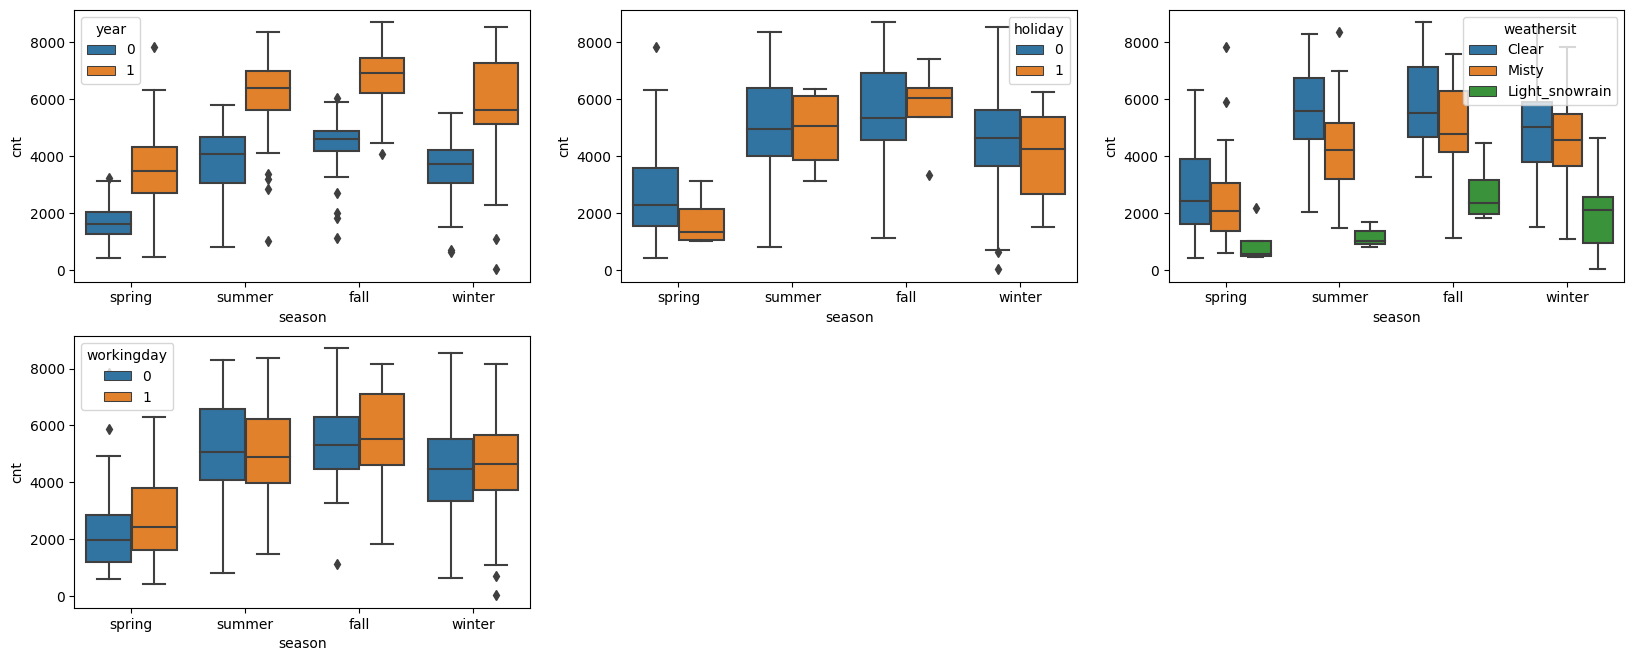

In [375]:
print("################################################################")
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue = 'year', data = df)

plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = df)



plt.show()



In [376]:


# Now since the vars are being tagged as categorical, create dummy vars for these categorical vars and
# simultaneously drop the first dummy vars for each of these variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [377]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [378]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,1,0,0,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,0


In [379]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [380]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   feb             730 non-null    uint8  
 9   mar             730 non-null    uint8  
 10  apr             730 non-null    uint8  
 11  may             730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  july            730 non-null    uint8  
 14  aug             730 non-null    uint8  
 15  sep             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  nov             730 non-null    uin

In [381]:
# numerical_vars = []
# sns.pairplot(data=df, vars=[], diag_kind='kde')


In [382]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [383]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [384]:
print(df_train.shape)
print(df_test.shape )

(510, 30)
(220, 30)


In [385]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [386]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,1,0,1,0,1,0,0


In [387]:
# Apply scale to the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [388]:
# Check if scaling is dont

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,1,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,1,1,0,1,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,1,0,1,0,1,0,0


In [389]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.066667,0.098039,...,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412,0.247059,0.262745,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.249689,0.297660,...,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124,0.431725,0.440557,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


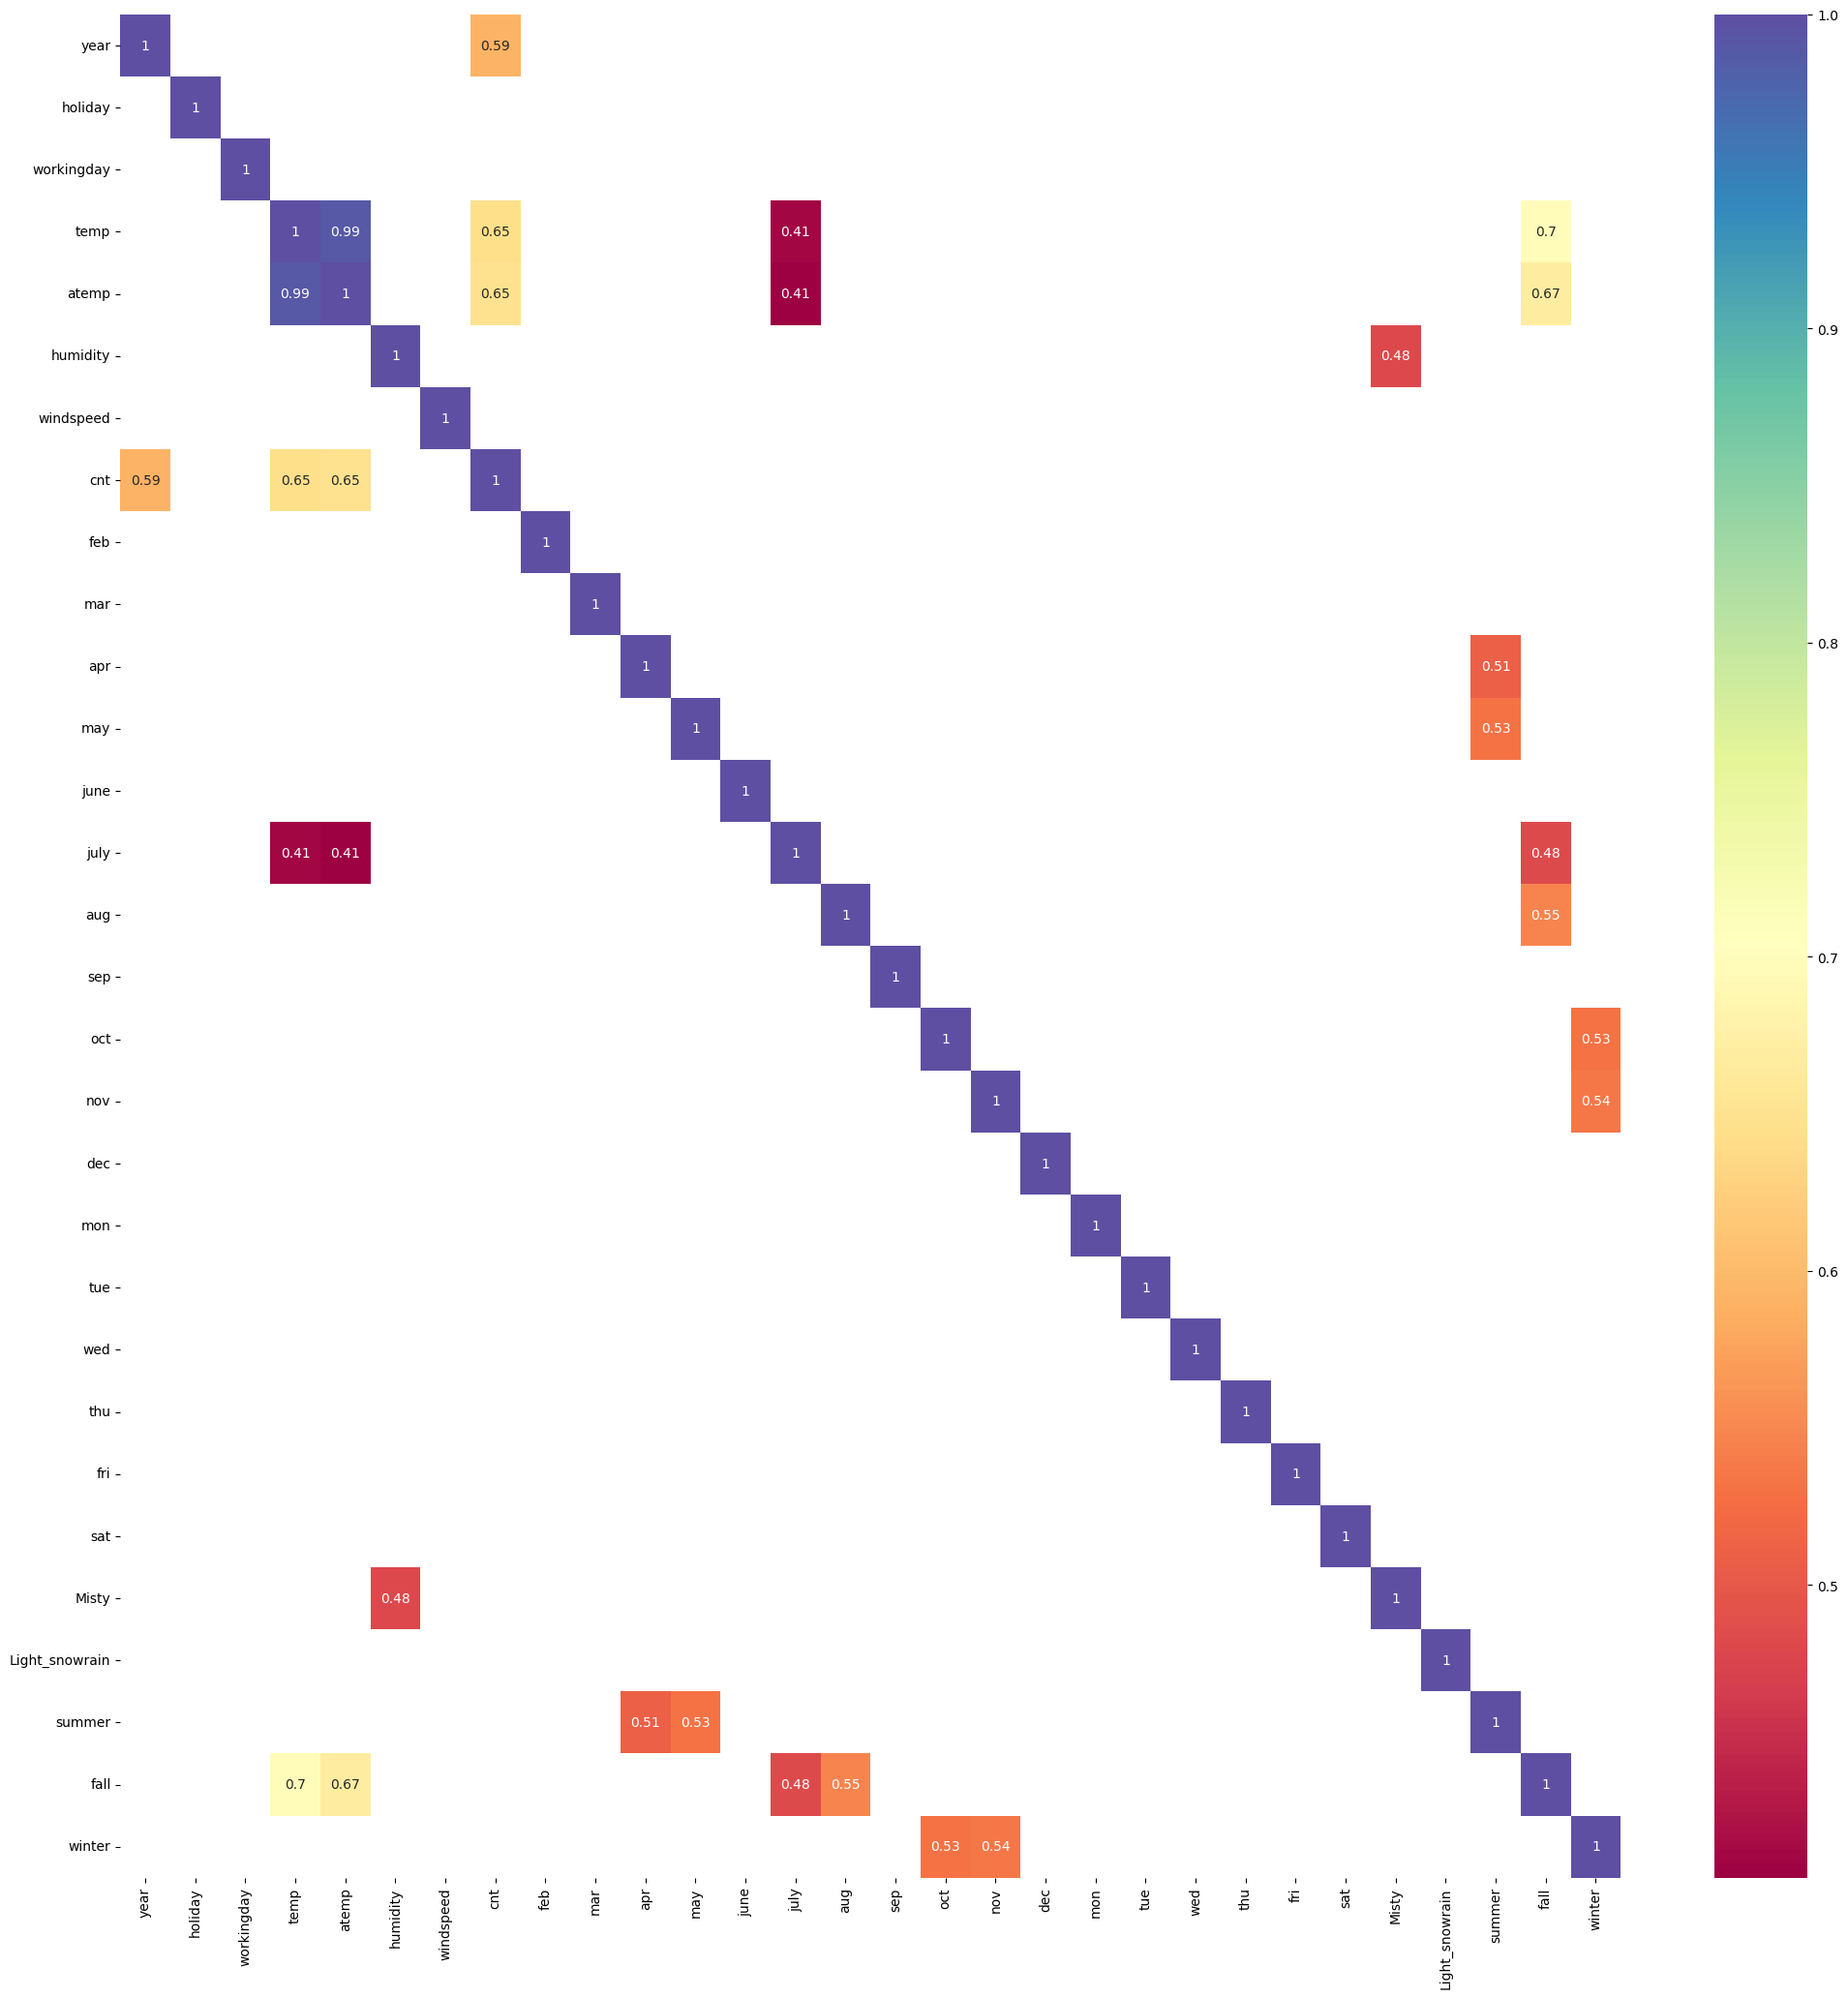

In [390]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
# sns.heatmap(df_train.corr(), annot = True, cmap="Spectral", mask=matrix)

highCorr = df_train.corr()[df_train.corr()>0.4]

sns.heatmap(data=highCorr, annot = True, cmap="Spectral")


plt.show()

#### cnt seems to have correlation with year, temp and atemp.
#### fall seems to have correlation with temp and atemp.

#### Similarly, Misty and humidity show correlation.
#### Spring season with Jan and Feb month, Summer season with april, may month and Winter season with oct, nov month show good correlation.

# Visualizing one of the correlation to see the trends via Scatter plot.

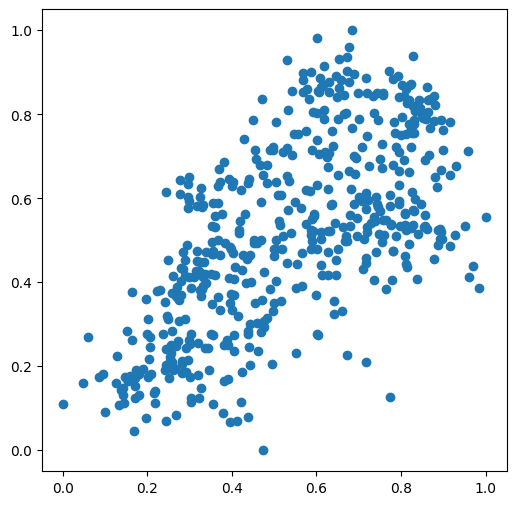

In [391]:


plt.figure(figsize=[6,6])
plt.scatter(x=df_train.temp, y=df_train.cnt)
plt.show()

### As observed earlier, visualization confirms the positive correlation between temp and cnt.

## Building a Model

In [392]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [393]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

# rfe = RFE(lm)
# rfe = RFE(lm, 15)
# rfe = rfe.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE to the data
rfe.fit(X_train, y_train)

# Get the selected features (if you want to use them)
selected_features = X_train.columns[rfe.support_]



In [394]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('feb', False, 12),
 ('mar', False, 2),
 ('apr', False, 4),
 ('may', False, 3),
 ('june', False, 5),
 ('july', False, 13),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 14),
 ('dec', False, 15),
 ('mon', False, 7),
 ('tue', False, 8),
 ('wed', False, 10),
 ('thu', False, 11),
 ('fri', False, 9),
 ('sat', True, 1),
 ('Misty', True, 1),
 ('Light_snowrain', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

In [395]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'aug',
       'sep', 'oct', 'sat', 'Misty', 'Light_snowrain', 'summer', 'fall',
       'winter'],
      dtype='object')


In [396]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'nov', 'dec',
       'mon', 'tue', 'wed', 'thu', 'fri'],
      dtype='object')

In [397]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [398]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [399]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,24.07
4,humidity,17.44
13,fall,8.19
2,workingday,5.05
5,windspeed,3.88
12,summer,3.46
14,winter,2.85
10,Misty,2.15
0,year,2.04
9,sat,1.91


year, humidity and temp shows high VIF value.

## Step 5: Building a linear model

By following this model:

- High VIF, High P Value
- High VIF, Low P Value
- Low VIF, High P Value
- Low VIF, Low P Value





In [400]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.17e-191
Time:                        16:10:33   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1952      0.029      6.

In [401]:
# As year, humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,16.82
12,fall,7.78
2,workingday,4.45
4,windspeed,3.72
11,summer,3.42
13,winter,2.75
0,year,2.04
5,aug,1.85
8,sat,1.78
7,oct,1.63


## Building Second linear regression model

```
# This is formatted as code
```




In [402]:

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.58e-188
Time:                        16:10:33   Log-Likelihood:                 509.66
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     495   BIC:                            -925.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1003      0.019      5.

In [403]:
# We can drop oct variable as it has high p-value
X_train_new = X_train_new.drop(['oct'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,16.13
11,fall,7.66
2,workingday,4.39
4,windspeed,3.71
10,summer,3.35
12,winter,2.42
0,year,2.04
5,aug,1.85
7,sat,1.77
8,Misty,1.55


## Building 3rd linear regression model

In [404]:

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.53e-188
Time:                        16:10:34   Log-Likelihood:                 507.16
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     496   BIC:                            -927.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0954      0.019      4.

In [405]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['aug'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,16.12
10,fall,6.55
2,workingday,4.39
4,windspeed,3.71
9,summer,3.35
11,winter,2.42
0,year,2.03
6,sat,1.77
7,Misty,1.54
5,sep,1.28


##Building 4th Model

In [406]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.16e-188
Time:                        16:10:34   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0941      0.019      4.

In [407]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,15.83
9,fall,6.52
1,workingday,4.06
3,windspeed,3.61
8,summer,3.34
10,winter,2.41
0,year,2.03
5,sat,1.69
6,Misty,1.54
4,sep,1.27


In [408]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.42e-188
Time:                        16:10:34   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0852      0.019      4.

#### We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 253 (which is greater than 1) and the p-value of 3.13e-188 i.e almost equals to zero, states that the overall model is significant

In [409]:
lr_5.params

const             0.085183
year              0.234402
workingday        0.055472
temp              0.479554
windspeed        -0.150006
sep               0.087256
sat               0.066696
Misty            -0.080390
Light_snowrain   -0.289256
summer            0.117994
fall              0.055396
winter            0.151189
dtype: float64

## Step 6: Residual Analysis of the train data and validation


In [410]:
X_train_lm_5

,const,year,workingday,temp,windspeed,sep,sat,Misty,Light_snowrain,summer,fall,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,0,1,0,0
111,1.0,0,1,0.345824,0.380981,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,1,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,0,1,0,0


In [411]:
y_train_pred = lr_5.predict(X_train_lm_5)

#### Normality of error terms

Text(0.5, 0, 'Errors')

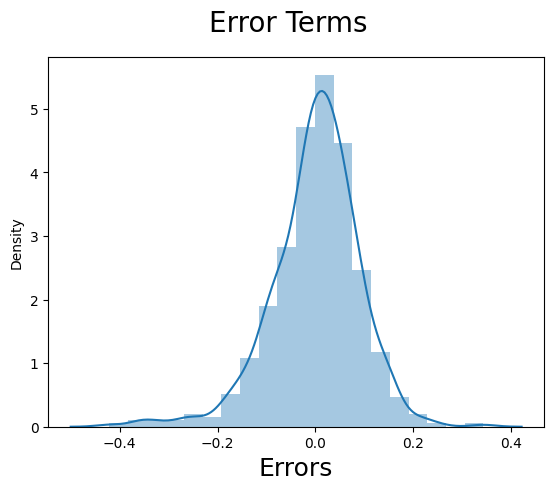

In [412]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [413]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,15.83
9,fall,6.52
1,workingday,4.06
3,windspeed,3.61
8,summer,3.34
10,winter,2.41
0,year,2.03
5,sat,1.69
6,Misty,1.54
4,sep,1.27


###VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

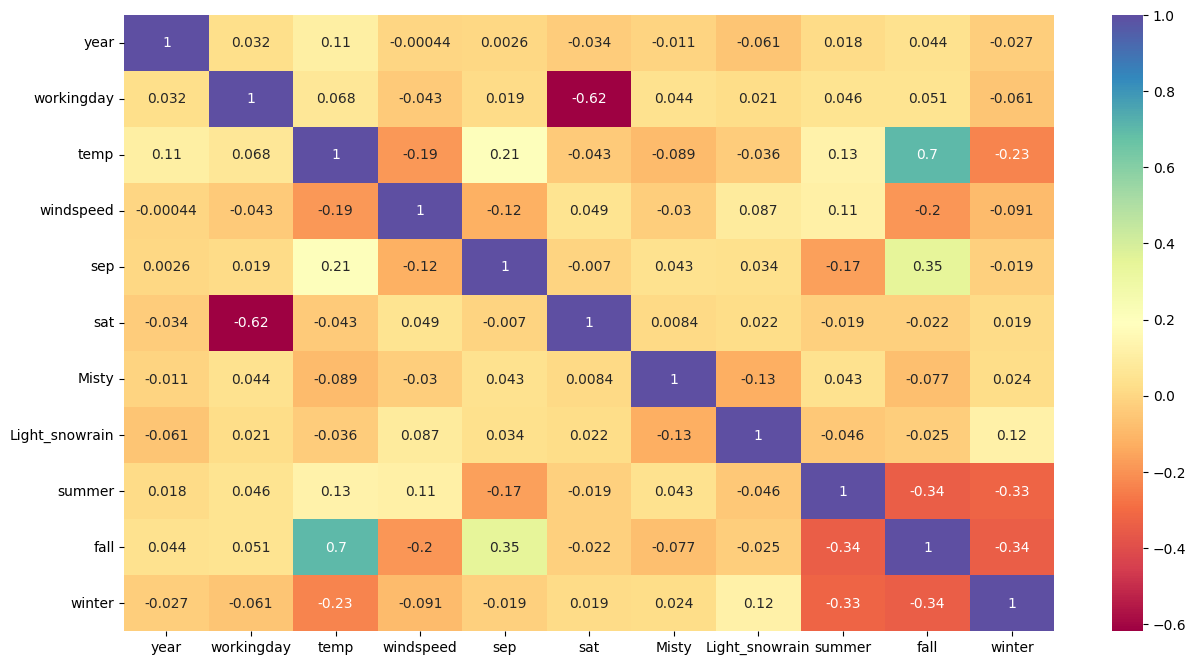

In [414]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Spectral")
plt.show()

#### Linearity

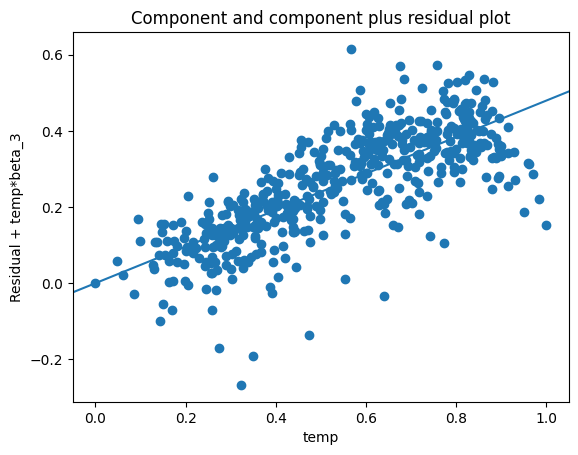

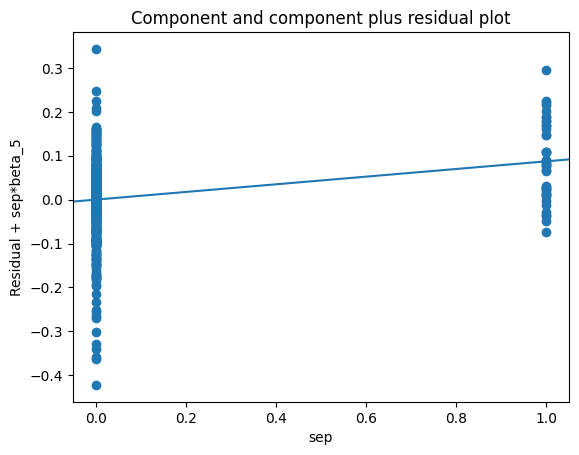

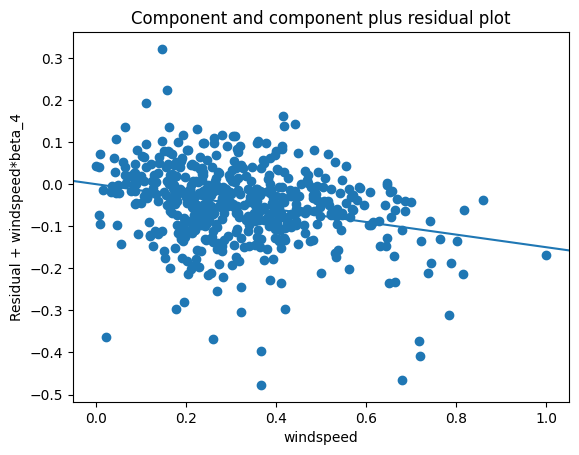

In [415]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

#### Homoscedasticity

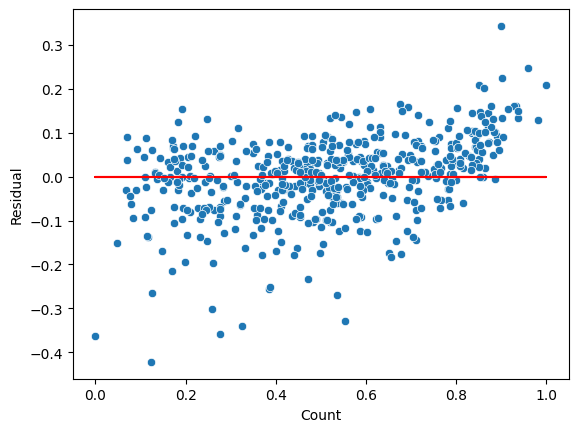

In [416]:


y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred

# Use 'x' and 'y' parameters to specify the data for the scatter plot
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')  # I assume this line is for plotting y = 0 as a reference line
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

In [417]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,1,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,1,0,0


In [418]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,feb,mar,...,tue,wed,thu,fri,sat,Misty,Light_snowrain,summer,fall,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.100000,0.054545,...,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273,0.263636,0.245455,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.300684,0.227609,...,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [419]:
y_test = df_test.pop('cnt')
X_test = df_test

col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [420]:
y_pred = lr_5.predict(X_test_lm_5)

In [421]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8063

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

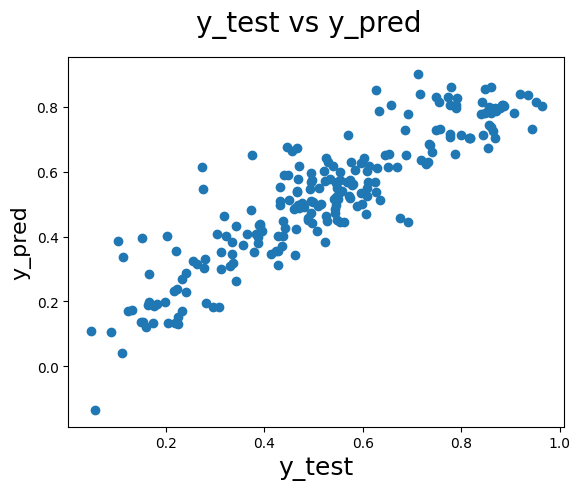

In [422]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [423]:
round(lr_5.params,4)

const             0.0852
year              0.2344
workingday        0.0555
temp              0.4796
windspeed        -0.1500
sep               0.0873
sat               0.0667
Misty            -0.0804
Light_snowrain   -0.2893
summer            0.1180
fall              0.0554
winter            0.1512
dtype: float64

# **Here is the equation of our best fitted model:**

<div class="well">
<h1><span style="color: #0000ff;">cnt</span> <span style="color: #0000ff;">=</span> <span style="color: #0000ff;">0.0750 +&nbsp;0.2344 *&nbsp;year +&nbsp;0.0555 * workingday +&nbsp;&nbsp;0.4796 * temp&nbsp; +&nbsp;0.0873 *&nbsp;sep +&nbsp;0.0667 *&nbsp;sat +&nbsp;0.1180 *&nbsp;summer + 0.0554 *&nbsp;fall +&nbsp;0.1512 *&nbsp;winter&nbsp;- 0.0804 *&nbsp;Misty&nbsp;-0.2893 *&nbsp;Light_snowrain&nbsp;- 0.1500 *&nbsp;windspeed</span></h1>
<h2>&nbsp;</h2>
</div>

In [424]:
# Calculating Adjusted-R^2 value for the test dataset

test_adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(test_adjusted_r2)

0.7961


#Model Eveluation

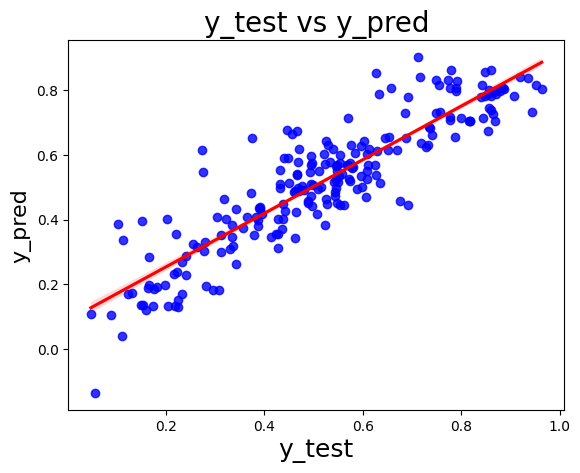

In [425]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [426]:
##### Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))



0.09622852248447021

### _`Conclusion`_:
#### Comparison between Training and Testing dataset:
    - Train R-squared:                       0.835
    - Train Adj. R-squared:                  0.832

    - Test R-squared:                       0.7961
    - Test Adj. R-squared:                  0.7864


#### Demand of bikes depend on following:
    - year              
    - workingday        
    - temp                
    - sep              
    - sat              
    - summer           
    - winter           
    - Misty            
    - Light_snowrain   
    - windspeed       

#### So the company should keep in mind the aforementioned predictor variables while preparing//enhancing bike rental strategy.

In [427]:
from importlib import metadata
packages = metadata.distributions()
lst = ['python', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'statsmodels', 'sklearn']
for p in packages:
    name = p.metadata["Name"]

    indices = [i for i, x in enumerate(lst) if name in x]
    if indices:
        version = p.version
        res = name+ ":" +version
        print(res)

pandas:1.5.3
seaborn:0.12.2
scikit-learn:1.2.2
numpy:1.23.5
matplotlib:3.7.1
statsmodels:0.13.5


# Linear Regression Assignment
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same.


## Table of Contents
* [Bike Sharing Assignment Intro](#bike-sharing-assignment-intro)
* [Business Goals](#business-goals)
* [Data Preparation](#data-preparation)
* [Model Building](#model-building)
* [Model Evaluation](#model-evaluation)
* [Conclusions](#conclusions)
* [Technologies Used](#technologies-used)
* [Contact](#contact)
* [Acknowledgements](#acknowledgements)

<!-- You can include any other section that is pertinent to your problem -->
## Bike Sharing Assignment Intro
This is an assignment wherein a multiple linear regression model is expected to be built, to predict demand for bikes depending on the current trend.

In this programming task, you will create a multiple linear regression model that can estimate the demand for shared bikes based on the current trend. Shared bikes are bikes that people can rent and use for a short time, either for free or for a fee. They can pick up a bike from a computerized station, where they enter their payment information and get a code to unlock the bike. They can then drop off the bike at another station that belongs to the same system.

## Business Goals
The primary aim of this project is to create a multiple linear regression model that can forecast the demand for shared bikes using the available explanatory variables. This predictive tool will assist management in understanding how demand fluctuates in response to various factors. Consequently, they can adapt their business strategy to align with demand patterns and enhance customer satisfaction. Additionally, the model will prove invaluable for management in comprehending demand patterns in new markets.

##  Data Preparation
Within the dataset, certain features such as 'weathersit' and 'season' are represented by numerical values 1, 2, 3, and 4, corresponding to different categories (refer to the data dictionary for explanations). However, it's important to note that these numbers do not imply any inherent order or ranking among the categories (inspect the data dictionary to understand why). Therefore, it's advisable to convert these numerical values into categorical text labels before constructing the model. Be sure to review the data dictionary for a more comprehensive understanding of all independent variables. Additionally, observe the 'yr' feature, which assumes values 0 and 1 representing the years 2018 and 2019 respectively. While it might seem logical to omit this feature due to its binary nature, it's worth considering that the demand for these bike-sharing systems is growing annually. Thus, the 'yr' feature might serve as a valuable predictor.



## Model Building
The dataset encompasses three features: 'casual', 'registered', and 'cnt'. 'Casual' signifies the count of non-registered users who rented a bike, while 'registered' corresponds to the count of registered users who reserved a bike on a given day. The 'cnt' feature aggregates the total number of bike rentals, encompassing both casual and registered users. Your model-building efforts should revolve around predicting this 'cnt' variable.

## Model Evaluation
After you have built the model and analyzed the residuals and made predictions on the test set, please make sure you use these two lines of code to find out the R-squared score on the test set:

```python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.


## Conclusions
- The target variable is cnt, which is the number of bike rentals in a day.
- There are more than three features that have a positive correlation with the target variable, which means they increase the demand for bike rentals.
- The features that have the highest positive correlation with the target variable are atemp, yr, season_winter and mnth_Sep, with correlation values of 0.4632, 0.2350, 0.0412 and 0.0587 respectively.

We can see that the equation for best fitted line is:
```cnt = 0.0750 + 0.2344 * year + 0.0555 * workingday +  0.4796 * temp  + 0.0873 * sep + 0.0667 * sat + 0.1180 * summer + 0.0554 * fall + 0.1512 * winter - 0.0804 * Misty -0.2893 * Light_snowrain - 0.1500 * windspeed```

Comparision between Training and Testing dataset:

| **Item**              | **Train Data Set** | **Test Data Set** |
| --------------------- | -------------------| -------------     |
| Train R-squared:      | 0.835              |  0.7961           |
| Train Adj. R-squared: | 0.832              |  0.7864           |


## Technologies-Used
- pandas - version 1.5.3
- seaborn - version 0.12.2
- scikit-learn - version 1.2.2
- numpy - version 1.23.5
- matplotlib - version 3.7.1
- statsmodels - version 0.13.5
- Python Version - version  3.10.12

## Contact
Created by [@saurabhbhargava6] - feel free to contact me!

## Acknowledgements
Give credit here.
- https://seaborn.pydata.org/
- https://pandas.pydata.org/
- https://learn.upgrad.com/
- https://github.com/ContentUpgrad/Linear-Regression/tree/main


## Conclusion

Significant variables to predict the demand for shared bikes

- holiday
- temp
- Season
- months(January, July, September, November, December)
- Year (2019)
- weathersit( Light Snow, Mist + Cloudy)
